In [82]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('medical_examination.csv')

In [83]:
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


Task-1: Create a column describing the BMI

In [84]:
BMI = df.weight/np.square(df.height/100)
df['Overweight'] = [1 if i>25 else 0  for i in BMI]

Task-2: Normalize the data by making 0 always good and 1 always bad. If the value of cholesterol or gluc is 1, make the value 0. If the value is more than 1, make the value 1.

In [85]:
df.cholesterol = [0 if i==1 else 1 for i in df.cholesterol]
df.gluc = [0 if i==1 else 1 for i in df.gluc]
df.head(3)

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,Overweight
0,0,18393,2,168,62.0,110,80,0,0,0,0,1,0,0
1,1,20228,1,156,85.0,140,90,1,0,0,0,1,1,1
2,2,18857,1,165,64.0,130,70,1,0,0,0,0,1,0


Task-3 : Convert the data into long format and create a chart that shows the value counts of the categorical features using seaborn's catplot(). The dataset should be split by 'Cardio' so there is one chart for each cardio value

C:\Users\akhil\anaconda3\envs\data\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


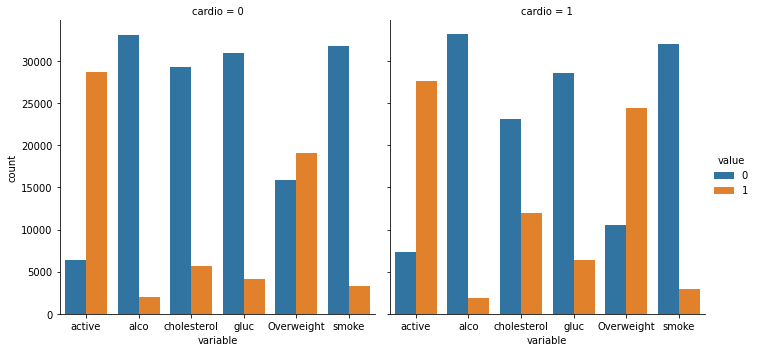

In [86]:
df_melt = pd.melt(df,'cardio' ,['active', 'alco','cholesterol', 'gluc', 'Overweight','smoke' ])
fig = sns.catplot('variable',data =df_melt,col = 'cardio', kind = 'count', hue='value')
fig.savefig('catplot.jpg')

In [87]:
df.shape

(70000, 14)

Task-4: Cleaning the data

In [88]:
#diastolic pressure > sysstolic
df_heat = df[df.ap_lo < df.ap_hi]
#height is greater than 2.5th percentile and less than 97.5th percentile
df_heat = df_heat[(df_heat['height'] >= df_heat['height'].quantile(0.025)) & (df_heat['height'] <= df_heat['height'].quantile(0.975))]
#weight is greater than 2.5th percentile and less than 97.5th percentile
df_heat = df_heat[(df_heat['weight'] >= df_heat['weight'].quantile(0.025)) & (df_heat['weight'] <= df_heat['weight'].quantile(0.975))]

df_heat.shape

(62783, 14)

Task-5: Create a correlation dataset and plot it using seaborn's heatmap

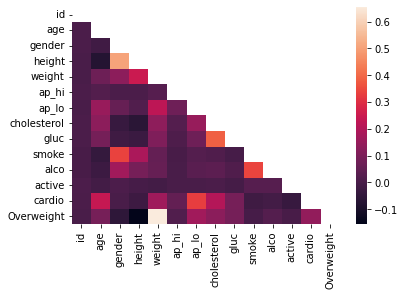

In [89]:
df_corr = df_heat.corr()
mask = np.zeros_like(df_corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True

fig,ax = plt.subplots()
ax = sns.heatmap(df_corr, mask = mask)
fig.savefig('correlation_2.jpg')